<a href="https://colab.research.google.com/github/afifibd/Machine-Learning/blob/main/UAS/UAS_CNN_AlexNet_MNIST_ANGKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Afif Ibadurrahman Jalaluddin

Nim : 1103210221

Tugas : UAS Machine Learning

Dataset : MNIST ANGKA

Model : CNN, Alexnet

Link Referensi : https://www.youtube.com/watch?v=Rf5bSKrLsnk

# 1. Setup Google Colab dan Import Library yang Diperlukan

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Periksa versi PyTorch
print(torch.__version__)

2.3.0+cu121


# 2. Load dan Preprocess Dataset MNIST

 Mendownload dataset MNIST dan melakukan normalisasi pada gambar-gambar.

In [2]:
# Definisikan transformasi untuk data
transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Mengubah ukuran gambar menjadi 227x227 untuk AlexNet
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download dan load dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2773653.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 518422.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3835881.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7778901.09it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# 3. Membangun Model AlexNet

In [3]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

# Buat model dan pindahkan ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=10).to(device)

# 4. Melatih Model

Menggunakan optimizer Adam dan cross-entropy loss

In [4]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Fungsi untuk melatih model
def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Fungsi untuk menguji model
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

# Latih dan uji model
for epoch in range(1, 11):  # 10 epoch
    train(model, device, train_loader, optimizer, criterion, epoch)
    test(model, device, test_loader, criterion)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300278
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.319552
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.339359
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.106115
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.027885
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.074989
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.188439
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.244270
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.017247
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.353237

Test set: Average loss: 0.0001, Accuracy: 9788/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.124973
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.193019
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.032232
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.059095
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.021300
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.023743
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.011750
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.110561
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.314680
T

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Lists to store the predictions and ground truth labels
all_predictions = []
all_targets = []

# Test the model and collect predictions
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        all_predictions.extend(pred.cpu().numpy().flatten())
        all_targets.extend(target.cpu().numpy())

# Calculate precision, recall, and F1-score
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')


Precision: 0.9914, Recall: 0.9914, F1-score: 0.9914


# 5. Menampilkan Confusion Matrix

menyimpan nilai loss dan akurasi selama pelatihan, lalu menggambarkannya dalam grafik untuk melihat bagaimana performa model meningkat seiring waktu.

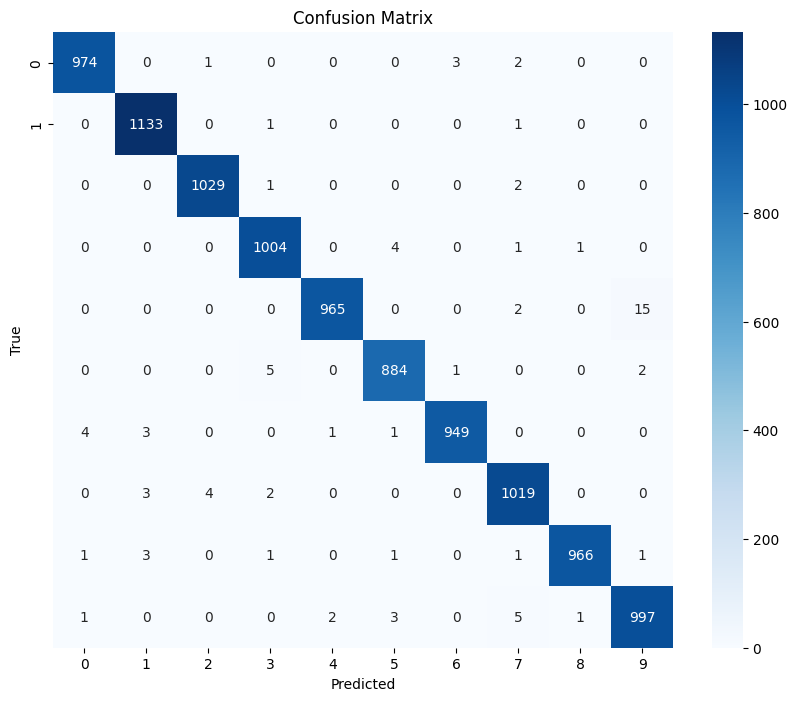

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Mendapatkan prediksi untuk seluruh test set
all_preds = torch.tensor([])
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        preds = output.argmax(dim=1)
        all_preds = torch.cat((all_preds, preds.cpu()), dim=0)

# Buat confusion matrix
cm = confusion_matrix(test_dataset.targets, all_preds.numpy())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(2)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 6. Visualisasi Prediksi

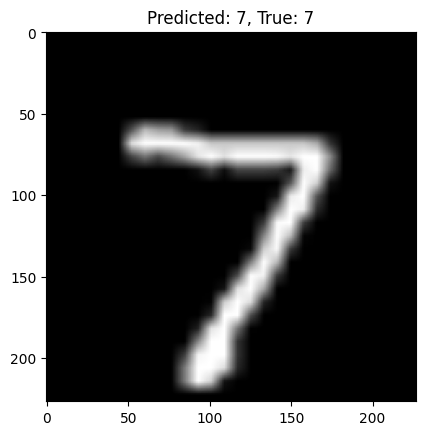

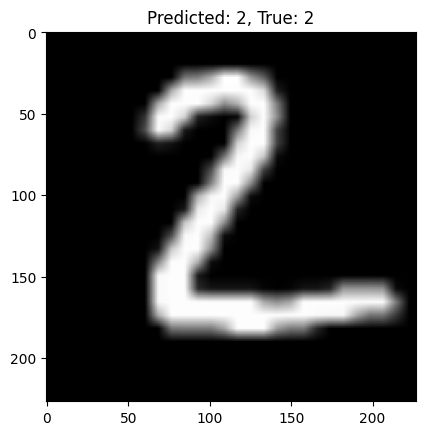

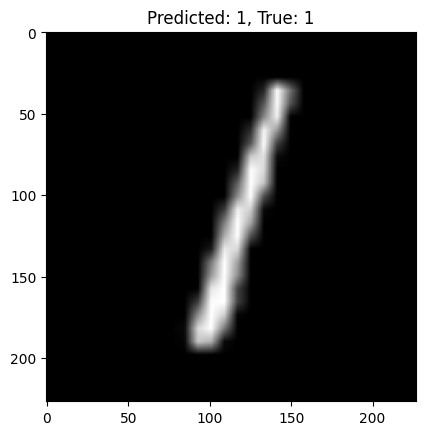

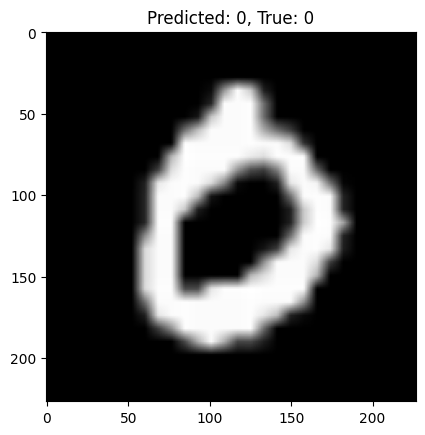

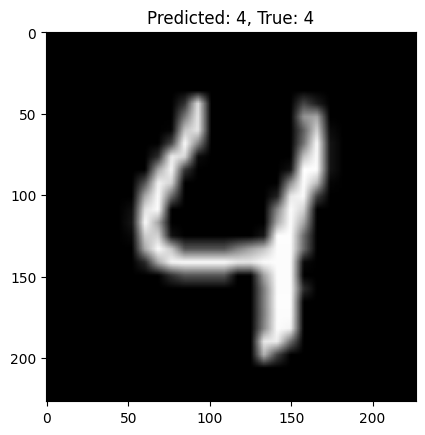

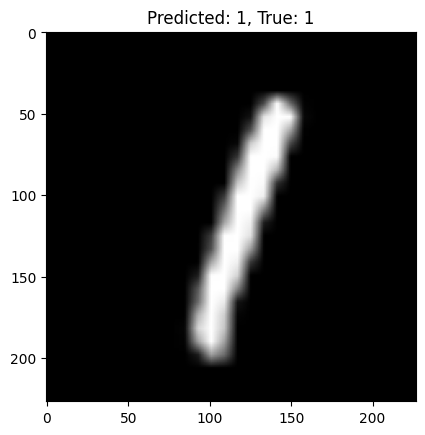

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dengan prediksi
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()

# Ambil beberapa gambar dari test set
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Prediksi menggunakan model
output = model(images)
_, preds = torch.max(output, 1)

# Tampilkan beberapa gambar beserta prediksinya
for idx in range(6):
    imshow(images[idx].cpu(), title=f'Predicted: {preds[idx].item()}, True: {labels[idx].item()}')
